In [1]:
import sys

import torch
import torch.nn as nn

sys.path.append("..")


In [2]:
from data.dataloader import LowLightDataModule
from model.blocks.singlestage import SingleStage
from utils.utils import show_batch, summarize_model


In [3]:
data_module = LowLightDataModule(
    train_dir="../data/1_train",
    valid_dir="../data/2_valid",
    bench_dir="../data/3_bench",
    infer_dir="../data/4_infer",
    image_size=128,
    batch_size=1,
    num_workers=4,
)

data_module.setup(stage="fit")


In [4]:
train_dataloader = data_module.train_dataloader()


torch.Size([1, 3, 128, 128])
torch.Size([1, 3, 128, 128])


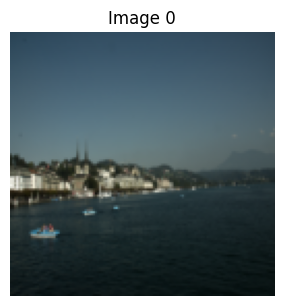

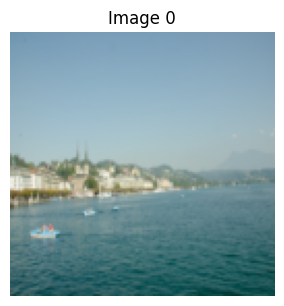

In [5]:
train_low, train_high = next(iter(train_dataloader))
print(train_low.shape)
print(train_high.shape)
show_batch(images=train_low)
show_batch(images=train_high)


In [6]:
singlestage = SingleStage(
    in_channels=3,
    out_channels=3,
    embed_dim=32,
    num_heads=8,
    mlp_ratio=4,
    patch_size=16,
    num_resolution=4,
    dropout_ratio=0.2,
    cutoff=0.1,
)


In [7]:
train_low = train_low.cuda()
singlestage = singlestage.cuda()


In [8]:
enh_high = singlestage(train_low)


TypeError: CrossAttentionBlock.forward() missing 1 required positional argument: 'c'

In [ ]:
show_batch(images=enh_high)
